In [2]:
import pandas as pd
path="../../Data/"
import seaborn as sns

In [3]:
def findcols(df,string):
    return [col for col in df if string in col]

In [4]:
df_pd=pd.read_parquet(path+'df_pd.parquet')

In [5]:
agemin=50
agemax=70
mask_age=(df_pd['age_when_attended_assessment_centre_f21003_0_0']>=agemin)&\
(df_pd['age_when_attended_assessment_centre_f21003_0_0']<=agemax)
df_pd_an=df_pd[mask_age]

In [11]:
df_pd_an.to_csv(path+'df_pd_an.csv')

In [15]:
findcols(df_pd_an,'walk')

['above_moderatevigorouswalking_recommendation_f22036_0_0',
 'usual_walking_pace_f924_0_0',
 'number_of_daysweek_walked_10_minutes_f864_0_0',
 'duration_of_walks_f874_0_0',
 'met_minutes_per_week_for_walking_f22037_0_0']

In [7]:
df_pd_an['bilirubin']=df_pd_an['total_bilirubin_f30840_0_0'].round(0)

<ipython-input-7-8889fe138648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd_an['bilirubin']=df_pd_an['total_bilirubin_f30840_0_0'].round(0)


In [8]:
df_pd_an['igf1']=df_pd_an['igf1_f30770_0_0'].round(0)

<ipython-input-8-755ff3e82a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd_an['igf1']=df_pd_an['igf1_f30770_0_0'].round(0)


<AxesSubplot:xlabel='igf1', ylabel='PD_rate'>

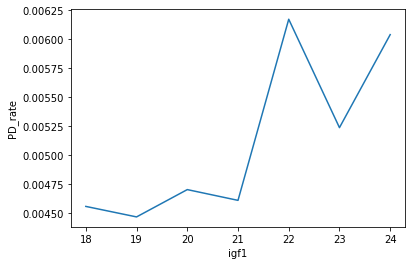

In [9]:
pd_igf1=pd.DataFrame(df_pd_an[pd.notnull(df_pd_an['igf1'])].groupby('igf1').agg({'PD':['mean','count','cumsum']})).reset_index()
pd_igf1.columns=['igf1','PD_rate','recs','rollingsum']
sns.lineplot(x='igf1',y='PD_rate',data=pd_igf1[(pd_igf1['recs']>20000)])

<AxesSubplot:xlabel='bilirubin', ylabel='PD_rate'>

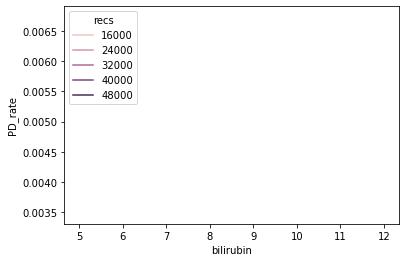

In [10]:
pd_bil=pd.DataFrame(df_pd_an[pd.notnull(df_pd_an['bilirubin'])].groupby('bilirubin').agg({'PD':['mean','count','cumsum']})).reset_index()
pd_bil.columns=['bilirubin','PD_rate','recs','rollingsum']
sns.lineplot(x='bilirubin',y='PD_rate',data=pd_bil[(pd_bil['recs']>10000)],hue='recs')

<AxesSubplot:xlabel='bilirubin', ylabel='recs'>

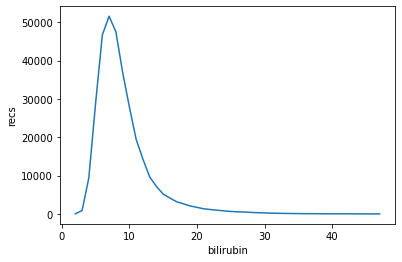

In [57]:
sns.lineplot(x='bilirubin',y='recs',data=pd_bil[(pd_bil['recs']>10)])

<AxesSubplot:xlabel='igf1', ylabel='recs'>

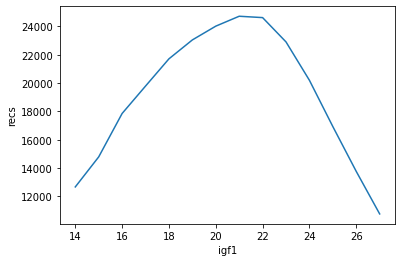

In [46]:
sns.lineplot(x='igf1',y='recs',data=pd_igf1[(pd_igf1['recs']>10000)])

<AxesSubplot:>

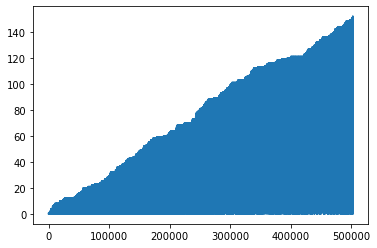

In [30]:
df_pd_an[pd.notnull(df_pd_an['igf1'])].groupby('igf1')['PD'].cumsum().plot()